In [8]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_excel('data/z_Masterfile.xlsx').dropna()
features_considered = ["WTI_price"]
features = df[features_considered]
features.index = df["Date"]

X = features.values


predicted=52.796804, expected=49.660000
predicted=54.686663, expected=51.120000
predicted=54.367147, expected=66.310000
predicted=71.242439, expected=69.890000
predicted=71.783033, expected=69.450000
predicted=70.136689, expected=69.960000
predicted=68.546807, expected=70.610000
predicted=67.549837, expected=77.000000
predicted=78.406957, expected=77.280000
predicted=78.324551, expected=79.360000
predicted=80.493141, expected=72.890000
predicted=70.904740, expected=79.660000
predicted=79.695829, expected=83.760000
predicted=85.065574, expected=86.150000
predicted=88.135038, expected=73.970000
predicted=72.337341, expected=75.630000
predicted=73.493395, expected=78.950000
predicted=78.611018, expected=71.920000
predicted=71.107720, expected=79.970000
predicted=83.557572, expected=81.430000
predicted=81.671538, expected=84.110000
predicted=85.674137, expected=91.380000
predicted=94.041721, expected=92.190000
predicted=92.152007, expected=96.970000
predicted=98.473362, expected=106.720000

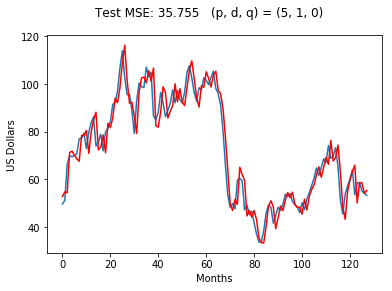

In [66]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
order = (5, 1, 0)
for t in range(len(test)):
	model = ARIMA(history, order=order)
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# plot
error = mean_squared_error(test, predictions)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.ylabel("US Dollars")
pyplot.xlabel("Months")
name = str(order)
pyplot.suptitle('Test MSE: %.3f' % error + '   (p, d, q) = ' + name)
pyplot.savefig("graphs/ARIMA/" + name)
print('Test MSE: %.3f' % error)
pyplot.show()
